## Dendrograma

In [1]:
# Importando as bibliotecas

import pandas as pd
import seaborn as sns
sns.set_theme(style='darkgrid', palette='pastel')
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('paises_do_mundo.csv')
df.head()

,pais,regiao,populacao,area,densidade_populacional,costa,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao,telefones,pec_aravel,perc_plantacao,perc_outras,clima,taxa_nascimento,taxa_mortalidade,agricultura,industria,servicos
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [10]:
# Diminuindo a base de dados para fazer o Dendrograma

paises = ['Angola', 'Argentina','Australia', 'Brazil', 'Chile',
         'Japan','Morroco', 'Senegal','Korea, South']

mini_df = df[df.pais.str.strip().isin(paises)].copy()
mini_df

,pais,regiao,populacao,area,densidade_populacional,costa,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao,telefones,pec_aravel,perc_plantacao,perc_outras,clima,taxa_nascimento,taxa_mortalidade,agricultura,industria,servicos
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,0.90,92.15,2.0,16.56,6.17,0.084,0.400,0.516
41,Chile,LATIN AMER. & CARIB,16134219,756950,21.3,0.85,0.00,8.80,9900.0,96.2,213.0,2.65,0.42,96.93,3.0,15.23,5.81,0.060,0.493,0.447
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,337.4,7.87,0.00,3.26,28200.0,99.0,461.2,12.19,0.96,86.85,3.0,9.37,9.16,0.017,0.258,0.725
110,"Korea, South",ASIA (EX. NEAR EAST),48846823,98480,496.0,2.45,0.00,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.00,5.85,0.033,0.403,0.563
180,Senegal,SUB-SAHARAN AFRICA,11987121,196190,61.1,0.27,0.20,55.51,1600.0,40.2,22.2,12.78,0.21,87.01,2.0,32.78,9.42,0.172,0.209,0.619


In [11]:
# Retirando as colunas em texto e a população e área
x = mini_df.iloc[:, 4:10].dropna().copy()

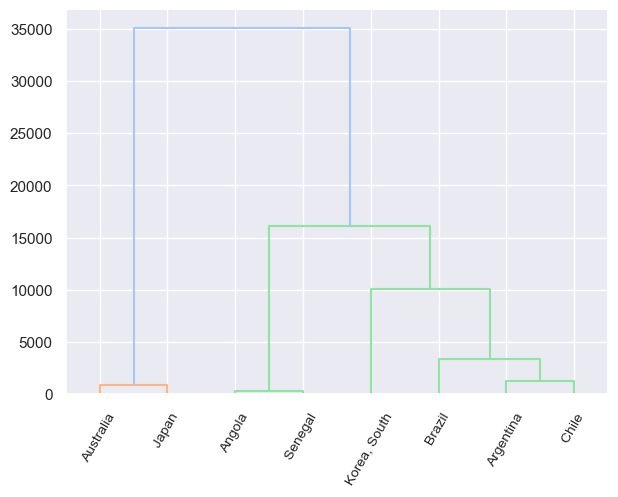

In [12]:
# Fazendo o Dendrograma

z = linkage(x, method='ward')

plt.figure(figsize=(7,5))
dendrogram(z, labels=list(mini_df.pais),
           orientation='top',
           leaf_font_size=10, leaf_rotation=60,);

## Clusterização Hierárquica

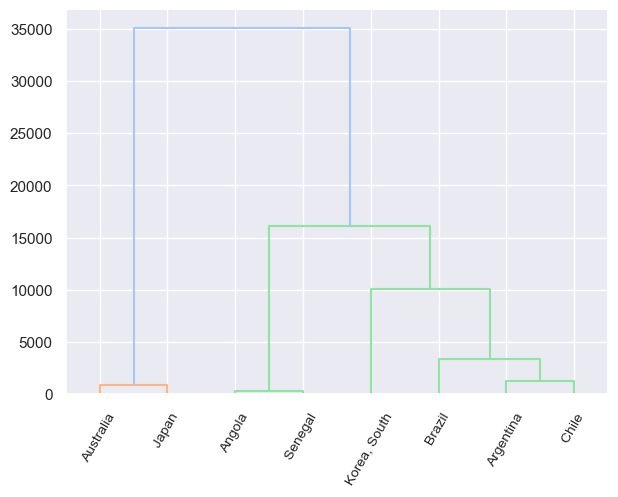

In [13]:
# Fazendo a comparação dos dendrogramas utilizando
# diferentes métodos
# Método Ward Linkage

z = linkage(x, method='ward')

plt.figure(figsize=(7,5))
dendrogram(z, labels=list(mini_df.pais),
           orientation='top',
           leaf_font_size=10, leaf_rotation=60,);

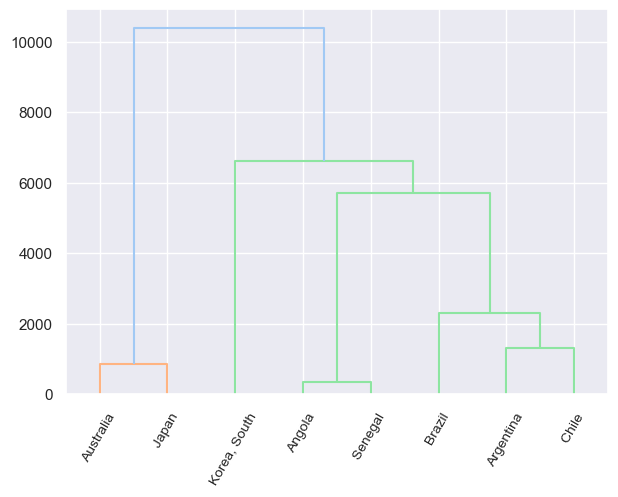

In [14]:
# Método Single Linkage
z = linkage(x, method='single')

plt.figure(figsize=(7,5))
dendrogram(z, labels=list(mini_df.pais),
           orientation='top',
           leaf_font_size=10, leaf_rotation=60,);

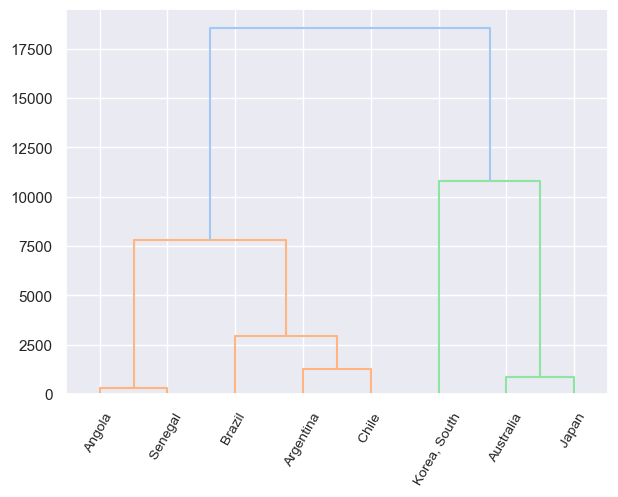

In [15]:
# Método Centroid Linkage
z = linkage(x, method='centroid')

plt.figure(figsize=(7,5))
dendrogram(z, labels=list(mini_df.pais),
           orientation='top',
           leaf_font_size=10, leaf_rotation=60,);

Percebe-se que utilizando o método Ward Linkage, a Coréia do Sul ficaria colocada entre os países da América Latina e os países da África.
Quando o método utilizado é o Single Linkage, a Coréia do Sul ainda é agrupada aos países da África e da America Latina antes de se agrupar ao Japão e a Austrália
Já quando se é utilizado o método de Centroid Linkage a Coréia do Sul se agrupa primeiro ao Japão e a Austrália do que aos países da África e da America Latina

## Clusterização Hierárquica na Prática

Fazendo uma clusterização hierárquica no dataset dos Penguins, para comparar com as espécies já presentes no Dataset e entender melhor o funcionamento do algoritmo

In [16]:
# Importando algumas outras bibliotecas necessárias

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [17]:
# Criando o DataFrame com os dados dos penguins
data = pd.read_csv('tamanho_pinguins.csv')

data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [18]:
# Apagando os dados faltantes e outliers
data = data.dropna()
data = data[data.larg_bico_mm < 50]

In [22]:
# Separando o df em um com os dados numéricos e outro
# com as espécies de penguins

x = data.iloc[:,2:-1]
y = data.iloc[:,0]

In [20]:
# Fazendo a normalização dos dados
scaler = MinMaxScaler()
x_ = scaler.fit_transform(x)

C:\Users\romul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


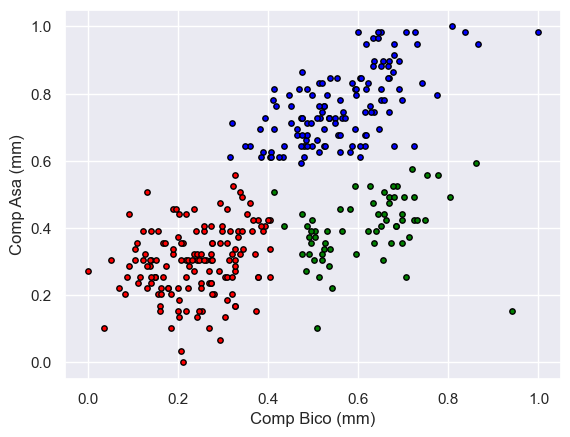

In [26]:
# Salvando os dados em 2 dimensões para facilitar a
# visualização e fazendo a clusterização utilizando KMeans nos dados
# e k=3, pois tempos 3 especies de penguins

x2 = x_[:,[0,2]]

kmeans = KMeans(n_clusters=3, random_state=3, n_init='auto').fit(x2)
labels = kmeans.labels_

plt.scatter(x2[labels == 0,0], x2[labels == 0,1], color = 'green', edgecolors = 'black', s=15)
plt.scatter(x2[labels == 1,0], x2[labels == 1,1], color = 'red', edgecolors = 'black', s=15)
plt.scatter(x2[labels == 2,0], x2[labels == 2,1], color = 'blue', edgecolors = 'black', s=15)
plt.xlabel('Comp Bico (mm)')
plt.ylabel('Comp Asa (mm)')
plt.show()

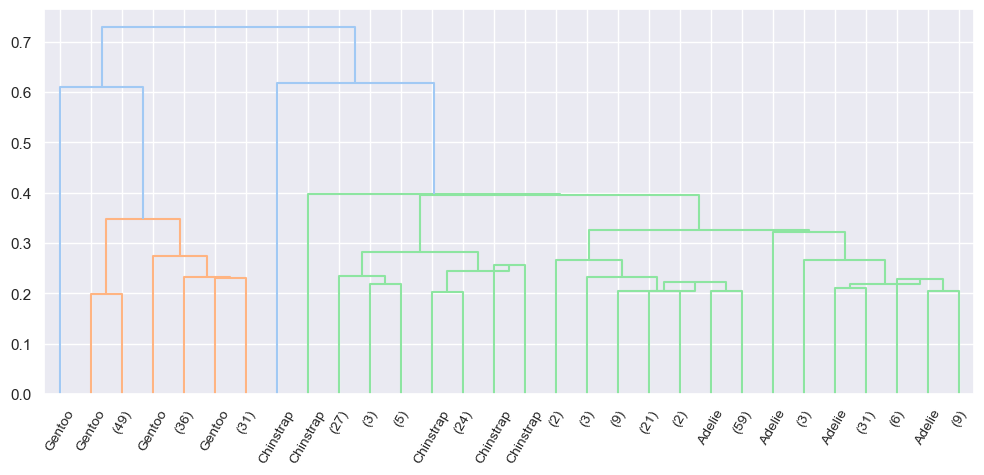

In [28]:
z = linkage(x_, method='centroid')

plt.figure(figsize=(12,5))
dendrogram(z, truncate_mode='lastp', labels=list(data.especie),
          orientation='top',
          leaf_font_size=10, leaf_rotation=60,);

Percebe-se que com o método utilizado, os penguins foram separados em dois grandes grupos, que aparecem no dendrograma com as cores laranja e verde. Também é possível verificar alguns outliers desses dois grupos.